<left>
<img src="idc_logo.png" width=100 align="left">
</left>

<H4>Advanced Stats. for Data Science (Spring 2022)</H4>

<H1>Examples from Lecture 9 </H1>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

import scipy
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt



np.random.seed(2021)
plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams.update({'font.size': 18})
%matplotlib inline

# Simple Regression

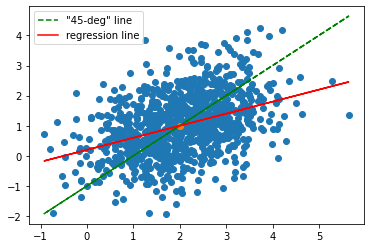

In [2]:
from scipy.stats import norm

rho = .4
sigX = 1
sigY = 1

mu_X = 2
mu_Y = 1

n = 1000

z = norm.rvs(size=(n, 2)).T
Sig = np.array([[sigX ** 2, sigX * sigY * rho],
                [sigX * sigY * rho, sigY ** 2]])
Sig_sqrt = np.linalg.cholesky(Sig)
x, y = np.array([[mu_X, mu_Y]]).T + Sig_sqrt @ z

plt.scatter(x, y)
plt.scatter(mu_X, mu_Y)

y_deg45 = mu_Y + sigY/sigX * (x - mu_X)
plt.plot(x, y_deg45, '--g')  # "45deg line"

y_reg = mu_Y + rho*sigY/sigX * (x - mu_X) # regression line
plt.plot(x, y_reg, 'r')
plt.legend(['"45-deg" line', 'regression line'])
plt.savefig("regression.png")
plt.show()

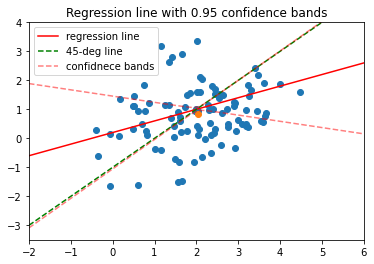

In [4]:
from scipy.stats import t

rho = .4
sigX = 1
sigY = 1

mu_X = 2
mu_Y = 1

n = 100

z = norm.rvs(size=(n, 2)).T
Sig = np.array([[sigX ** 2, sigX * sigY * rho],
                [sigX * sigY * rho, sigY ** 2]])
Sig_sqrt = np.linalg.cholesky(Sig)
x, y = np.array([[mu_X, mu_Y]]).T + Sig_sqrt @ z

plt.scatter(x, y)
plt.scatter(x.mean(), y.mean())

y_hat = mu_Y + rho*sigY/sigX * (x - mu_X)

xx = np.linspace(-2, 6, 100)

y_reg = mu_Y + rho*sigY/sigX * (xx - mu_X) # regression line
y_deg45 = mu_Y + sigY/sigX * (xx - mu_X)

plt.plot(xx, y_reg, 'r')
plt.plot(xx, y_deg45, '--g')

t_alpha = t.isf(.05 / 2, df = n-2)

s2 = np.linalg.norm(y - y_hat)/(n-2)
Sxx = np.mean((x - np.mean(x))**2)


y_reg2 = mu_Y + rho*sigY/sigX * (xx - mu_X) # regression line
y_band = t_alpha * np.sqrt(s2) * np.sqrt(1/n + (xx - np.mean(x))**2/Sxx )

plt.plot(xx, y_reg2 + y_band, '--r', alpha=.5)
plt.plot(xx, y_reg2 - y_band, '--r', alpha=.5)
plt.xlim((-2, 6))
plt.ylim((-3.5, 4))

plt.title(f"Regression line with {1-.05} confidence bands")
plt.legend(['regression line', '45-deg line', 'confidnece bands'])
plt.savefig("confidence_band.png")
plt.show()

### Prediction bands
We want to predict $y_{n+1}$ given $x_{n+1}$ and $(y_i,x_i)$, for $i=1,\ldots,n$.

In [ ]:
from scipy.stats import t

plt.scatter(x, y)
plt.scatter(x.mean(), y.mean())

plt.plot([mu_X - 4, mu_X+4], [mu_Y-4, mu_Y+4], '--g')  # "45deg line"

y_hat = mu_Y + rho*sigY/sigX * (x - mu_X)  # regression value for every x

xx = np.linspace(-2, 6, 100)
y_reg = mu_Y + rho*sigY/sigX * (xx - mu_X) # regression line

plt.plot(xx, y_reg, 'r')

t_alpha = t.isf(sig_level / 2, df = n-2)

s2 = np.linalg.norm(y - y_hat)/(n-2)
Sxx = np.mean((x - np.mean(x))**2)


y_reg2 = mu_Y + rho*sigY/sigX * (xx - mu_X) # regression line
y_band = t_alpha * np.sqrt(s2) * np.sqrt(1 + 1/n + (xx - np.mean(x))**2/Sxx )

plt.plot(xx, y_reg2 + y_band, '--r', alpha=.5)
plt.plot(xx, y_reg2 - y_band, '--r', alpha=.5)
plt.xlim((-2, 6))
plt.ylim((-3.5, 4))

plt.title(f"Regression line with {1-sig_level} prediction bands")
plt.legend(['45-deg line', 'regression line', 'prediction bands'])
plt.savefig("prediction_band.png")
plt.show()

# Multiple Regression (House Prices)

In [ ]:
# 
data = pd.read_csv("housing_prices.csv")
data = data[data.LotArea < 15000]  # we focus on small lots
data['h-MSZoning'] = data.MSZoning.apply(hash) # convert this categorical data to numeric

In [ ]:
data1 = data.select_dtypes('number').dropna()\
            .rename(columns = {'1stFlrSF': 'FirstFlrSF',
                              '2ndFlrSF': 'SecondFlrSF'}) # stats model formula cannot have
                                                          # covaraite names starting with non letter

variables =[
    'SalePrice',
    'LotArea', 
    'YearBuilt',
    #'LandSlope',
     'YrSold', 'MoSold', 
     'Fireplaces', 
    'GarageCars', 'ScreenPorch', 
     'HalfBath', 'FullBath',
     'GrLivArea', 
     'BedroomAbvGr',
    'FirstFlrSF', 
    'SecondFlrSF',
    'TotRmsAbvGrd',
    'LowQualFinSF', 'TotalBsmtSF',
    'LotFrontage', 'WoodDeckSF',
     'OverallQual',
     'OverallCond'
]

data1 = data1.filter(variables).dropna()
data1['logSalePrice'] = np.log(data1['SalePrice'])

In [ ]:
def detect_outliers(df, q=0.05):
    lower_outliers = df < df.quantile(q)
    upper_outliers = df > df.quantile(1-q)
    return lower_outliers + upper_outliers

mask = detect_outliers(data1, .01).any(1)
print(f"Masked a fraction of {mask.mean()} of the data due to outliers")
data2 = data1[mask]


#pd.plotting.scatter_matrix(data2, hist_kwds={'bins':30})
#plt.show()
#plt.rcParams["figure.figsize"] = (10,5)
#plt.rcParams.update({'font.size': 18})


In [ ]:
import statsmodels.formula.api as smf

covariates = [var for var in variables if var not in ['SalePrice', 'logSalePrice']]

target = 'SalePrice'
model = smf.ols(formula= target + " ~ " + " + ".join(covariates), data=data2).fit()
model.summary2()

In [ ]:
plt.rcParams['figure.figsize'] =  [10, 10]
plt.rcParams.update({'font.size': 10})

plt.scatter(data2.SalePrice, model.resid)
plt.title(f"Residuals vs. Target for Target = {target}")
plt.show()

The increased residuals for large values of the target usually indicates unstable variance (growing with value). A variance-stabilizing transformation is a good idea in this case.


In [ ]:

target = 'logSalePrice'
model2 = smf.ols(formula= target + " ~ " + " + ".join(covariates), data=data2).fit()
print(f"R^2 = {model2.rsquared}")

plt.scatter(data2.SalePrice, model2.resid)

plt.title(f"Residuals vs. Target for Target = {target}")
plt.show()



### Face value interpertation 
Missleading for ``FullBath`` and ``BedroomAbvGr``

### Interplay:
Correlation between ``OverallQual`` and ``OverallCond``


### Partial Correlation

In this example we want to ask whether the number of fireplaces affects positively on the price of a house, so that we know to build some in order to increase the value of ours. However, what if the number of fireplaces is merely a function of the number of rooms which responsible to the increase. In this case, adding additional fireplaces would not affect the price (becasue we did not changed the number of rooms). To account for the effect of fireplaces, we can adjust for the number of rooms. 

In [ ]:
import statsmodels.api as sm

varX = 'Fireplaces'
varY = 'SalePrice'
varZ = 'TotRmsAbvGrd' # total rooms above ground level

model_LotFrontageYearBuilt = smf.ols(formula= f"{varX} ~ {varZ}", data=data2).fit()
model_SalePriceYearBuilt = smf.ols(formula= f"{varY} ~ {varZ}", data=data2).fit()

X = sm.add_constant(model_LotFrontageYearBuilt.resid)
y = model_SalePriceYearBuilt.resid
model_res = sm.OLS(y, X).fit()
plt.scatter(model_LotFrontageYearBuilt.resid, model_SalePriceYearBuilt.resid)
plt.title(fr"Regressing residuls. Partial Correlation ({varX},{varY}), adjusting for {varZ} is $R^2 = {model_res.rsquared}$")
plt.show()


In [ ]:
model_res.summary2()

In [ ]:
target = 'SalePrice'
y = data2[target].values
X = data2.drop(target, axis=1)
Z = np.concatenate([np.ones((len(X), 1)).T, X.T]).T

beta_hat, res, rnk, s =  np.linalg.lstsq(Z, y, rcond=None)
print("beta_hat (lstsq) = ", beta_hat)
y_hat = Z @ beta_hat
e_hat = y - y_hat

SStot = np.sum( (y - np.mean(y)) **2 )
SSfit = np.sum( (y_hat - np.mean(y)) **2 )
print(f"R^2 = {SSfit / SStot}")